# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#cities

Number of cities in the list: 615


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key + "&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather ['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ullapool
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | camana
Processing Record 5 of Set 1 | naze
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | buritis
Processing Record 8 of Set 1 | sayyan
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | ostrovnoy
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | pershotravneve
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | zhuhai
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | dingle
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | norman wells
Processing Record 23 of Set 1 | sawakin
Processing Record 2

Processing Record 37 of Set 4 | zeya
Processing Record 38 of Set 4 | nelson bay
Processing Record 39 of Set 4 | aksarka
Processing Record 40 of Set 4 | kindia
Processing Record 41 of Set 4 | kuala terengganu
Processing Record 42 of Set 4 | kihei
Processing Record 43 of Set 4 | vrangel
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | choix
Processing Record 46 of Set 4 | velingara
Processing Record 47 of Set 4 | hami
Processing Record 48 of Set 4 | tanushimaru
Processing Record 49 of Set 4 | kavieng
Processing Record 0 of Set 5 | nhulunbuy
Processing Record 1 of Set 5 | umm bab
Processing Record 2 of Set 5 | igaci
Processing Record 3 of Set 5 | vestmannaeyjar
Processing Record 4 of Set 5 | sur
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | castro
Processing Record 8 of Set 5 | maciel
Processing Record 9 of Set 5 | aljezur
Processing Record 10 of Set 5 | nioro
Processing Record 11 of Set 5 | pres

City not found. Skipping...
Processing Record 26 of Set 8 | mehamn
Processing Record 27 of Set 8 | daru
Processing Record 28 of Set 8 | manzhouli
Processing Record 29 of Set 8 | chuy
Processing Record 30 of Set 8 | brigantine
Processing Record 31 of Set 8 | kuche
City not found. Skipping...
Processing Record 32 of Set 8 | siimusti
Processing Record 33 of Set 8 | bukoba
Processing Record 34 of Set 8 | majene
Processing Record 35 of Set 8 | honiara
Processing Record 36 of Set 8 | cruzeiro do sul
Processing Record 37 of Set 8 | imbituba
Processing Record 38 of Set 8 | bubaque
Processing Record 39 of Set 8 | saint george
Processing Record 40 of Set 8 | bathsheba
Processing Record 41 of Set 8 | saint anthony
Processing Record 42 of Set 8 | pangnirtung
Processing Record 43 of Set 8 | ucluelet
Processing Record 44 of Set 8 | kelso
Processing Record 45 of Set 8 | lang suan
Processing Record 46 of Set 8 | ixtapa
Processing Record 47 of Set 8 | xining
Processing Record 48 of Set 8 | almaznyy
Pro

Processing Record 12 of Set 12 | veraval
Processing Record 13 of Set 12 | pafos
Processing Record 14 of Set 12 | pulawy
Processing Record 15 of Set 12 | north bend
Processing Record 16 of Set 12 | mahuta
Processing Record 17 of Set 12 | pacific grove
Processing Record 18 of Set 12 | avera
Processing Record 19 of Set 12 | pravdinsk
Processing Record 20 of Set 12 | rapid valley
Processing Record 21 of Set 12 | lokoja
Processing Record 22 of Set 12 | kilakarai
Processing Record 23 of Set 12 | biryusinsk
Processing Record 24 of Set 12 | sungaipenuh
Processing Record 25 of Set 12 | novoagansk
Processing Record 26 of Set 12 | atbasar
Processing Record 27 of Set 12 | crab hill
City not found. Skipping...
Processing Record 28 of Set 12 | nouakchott
Processing Record 29 of Set 12 | dabakala
Processing Record 30 of Set 12 | guane
Processing Record 31 of Set 12 | the pas
Processing Record 32 of Set 12 | funadhoo
Processing Record 33 of Set 12 | hailey
Processing Record 34 of Set 12 | sao felix do

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ullapool,57.8987,-5.1604,10.19,74,100,2.92,GB,1681606886
1,ushuaia,-54.8000,-68.3000,6.81,70,75,2.06,AR,1681606827
2,hilo,19.7297,-155.0900,27.36,83,35,2.24,US,1681606898
3,camana,-16.6228,-72.7111,22.48,83,88,2.86,PE,1681606898
4,naze,28.3667,129.4833,20.51,60,0,3.69,JP,1681606899
...,...,...,...,...,...,...,...,...,...
559,santa cruz del sur,20.7147,-77.9956,26.45,73,100,3.41,CU,1681607220
560,luanda,-8.8368,13.2343,26.13,88,100,4.83,AO,1681607259
561,valley city,46.9233,-98.0032,0.29,100,100,7.72,US,1681607246
562,miramar,25.9873,-80.2323,27.22,82,0,4.12,US,1681607259


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ullapool,57.8987,-5.1604,10.19,74,100,2.92,GB,1681606886
1,ushuaia,-54.8000,-68.3000,6.81,70,75,2.06,AR,1681606827
2,hilo,19.7297,-155.0900,27.36,83,35,2.24,US,1681606898
3,camana,-16.6228,-72.7111,22.48,83,88,2.86,PE,1681606898
4,naze,28.3667,129.4833,20.51,60,0,3.69,JP,1681606899


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv('../output_data/cities.csv', index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv('../output_data/cities.csv', index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ullapool,57.8987,-5.1604,10.19,74,100,2.92,GB,1681606886
1,ushuaia,-54.8000,-68.3000,6.81,70,75,2.06,AR,1681606827
2,hilo,19.7297,-155.0900,27.36,83,35,2.24,US,1681606898
3,camana,-16.6228,-72.7111,22.48,83,88,2.86,PE,1681606898
4,naze,28.3667,129.4833,20.51,60,0,3.69,JP,1681606899
...,...,...,...,...,...,...,...,...,...
559,santa cruz del sur,20.7147,-77.9956,26.45,73,100,3.41,CU,1681607220
560,luanda,-8.8368,13.2343,26.13,88,100,4.83,AO,1681607259
561,valley city,46.9233,-98.0032,0.29,100,100,7.72,US,1681607246


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

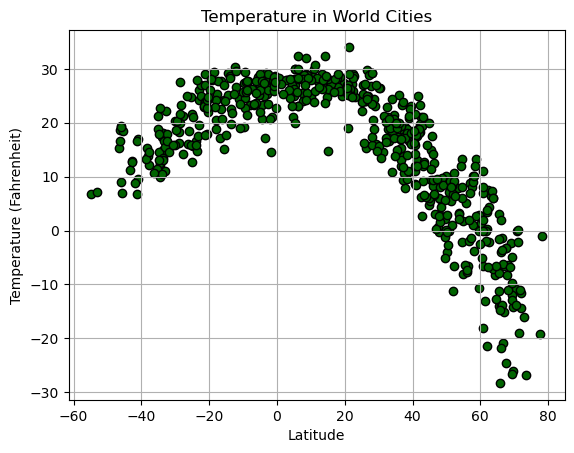

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker ="o",facecolor = "darkgreen", edgecolor = "black")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

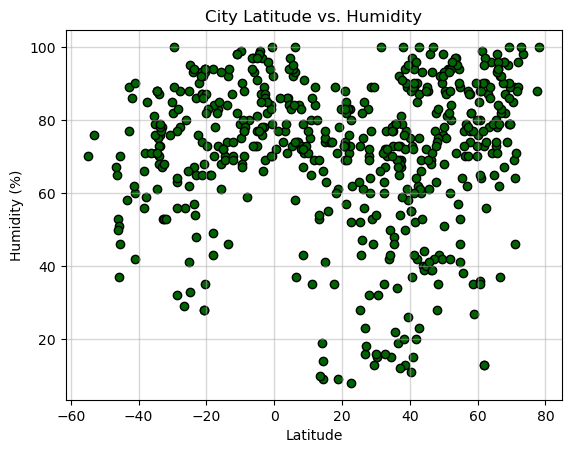

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "darkgreen", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

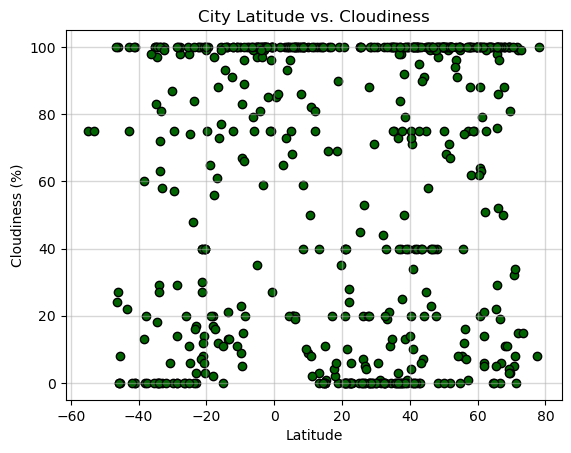

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "darkgreen", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

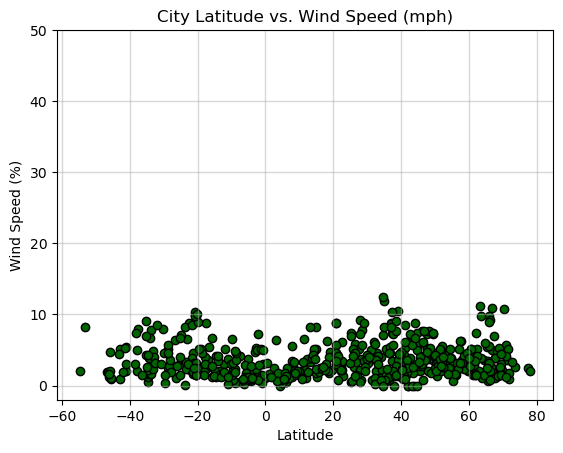

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "darkgreen", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-',linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >=0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ullapool,57.8987,-5.1604,10.19,74,100,2.92,GB,1681606886
2,hilo,19.7297,-155.0900,27.36,83,35,2.24,US,1681606898
4,naze,28.3667,129.4833,20.51,60,0,3.69,JP,1681606899
7,sayyan,15.1718,44.3244,14.73,63,1,1.21,YE,1681606900
8,kapaa,22.0752,-159.3190,25.05,71,28,3.13,US,1681606850


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] <0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,6.81,70,75,2.06,AR,1681606827
3,camana,-16.6228,-72.7111,22.48,83,88,2.86,PE,1681606898
5,port alfred,-33.5906,26.8910,14.91,76,63,2.89,ZA,1681606899
6,buritis,-15.6178,-46.4233,24.27,68,77,1.20,BR,1681606900
16,mataura,-46.1927,168.8643,18.66,53,100,1.24,NZ,1681606904


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.78.


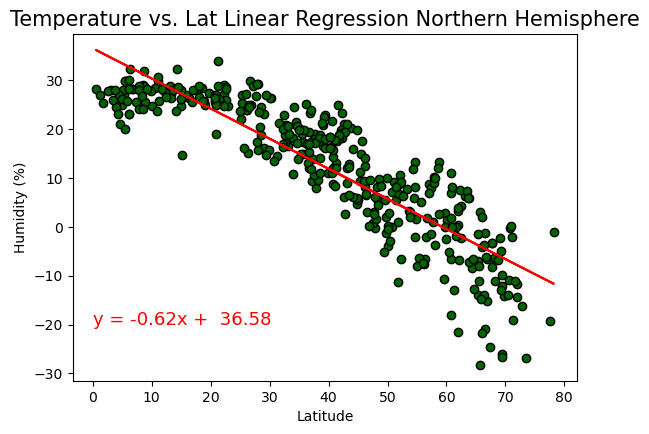

In [14]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x +  " + str(round(intercept,2))
plt.figure(figsize=[6.5,4.5])
plt.scatter(x_values, y_values,facecolor = "darkgreen", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (0,-20),fontsize=13, color="red")
plt.title("Temperature vs. Lat Linear Regression Northern Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.savefig("../output_data/Fig5.png")
plt.show()

The r-value is: 0.55.


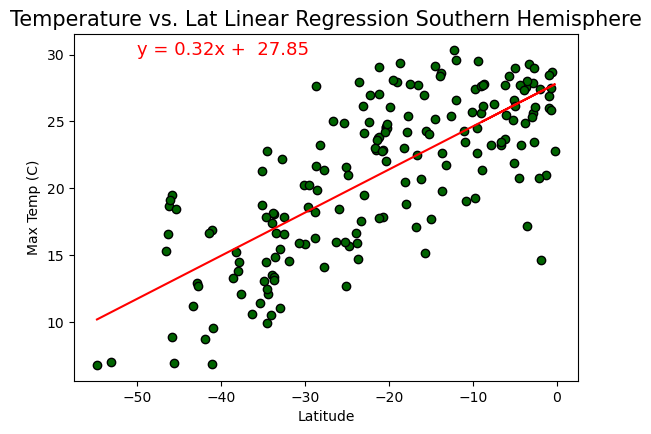

In [15]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x +  " + str(round(intercept,2))
plt.figure(figsize=[6.5,4.5])
plt.scatter(x_values, y_values,facecolor = "darkgreen", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-50,30),fontsize=13, color="red")
plt.title("Temperature vs. Lat Linear Regression Southern Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.savefig("../output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03.


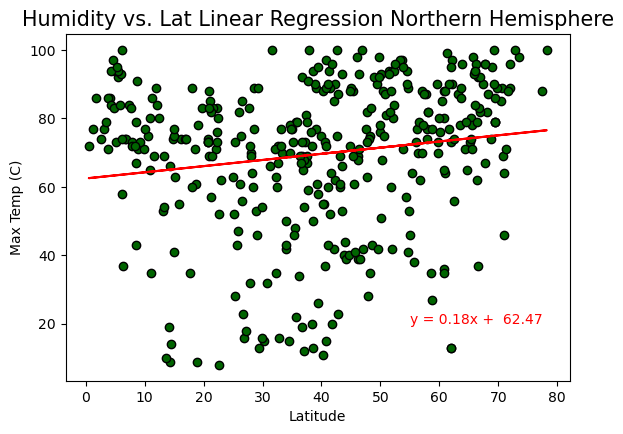

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x +  " + str(round(intercept,2))
plt.figure(figsize=[6.5,4.5])
plt.scatter(x_values, y_values,facecolor = "darkgreen", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (55,20),fontsize=10, color="red")
plt.title("Humidity vs. Lat Linear Regression Northern Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.savefig("../output_data/Fig7.png")
plt.show()

The r-value is: 0.13.


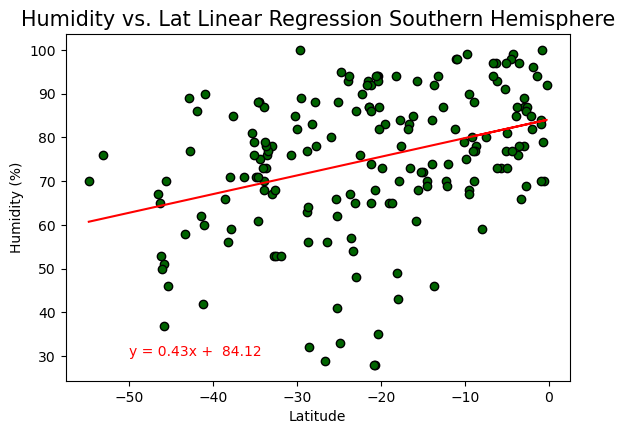

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x +  " + str(round(intercept,2))
plt.figure(figsize=[6.5,4.5])
plt.scatter(x_values, y_values,facecolor = "darkgreen", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-50,30),fontsize=10, color="red")
plt.title("Humidity vs. Lat Linear Regression Southern Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.savefig("../output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02.


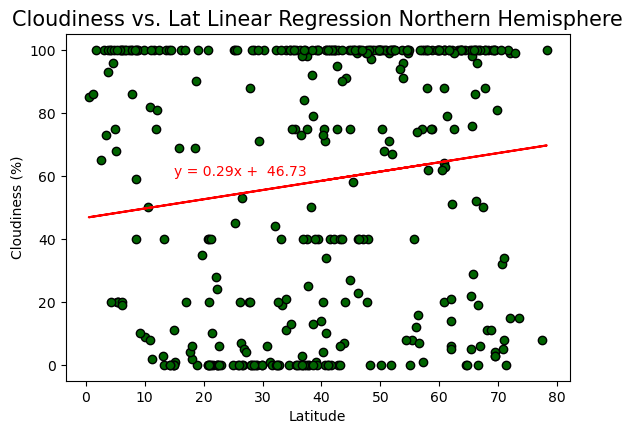

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x +  " + str(round(intercept,2))
plt.figure(figsize=[6.5,4.5])
plt.scatter(x_values, y_values,facecolor = "darkgreen", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (15,60),fontsize=10, color="red")
plt.title("Cloudiness vs. Lat Linear Regression Northern Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.savefig("../output_data/Fig9.png")
plt.show()

The r-value is: 0.12.


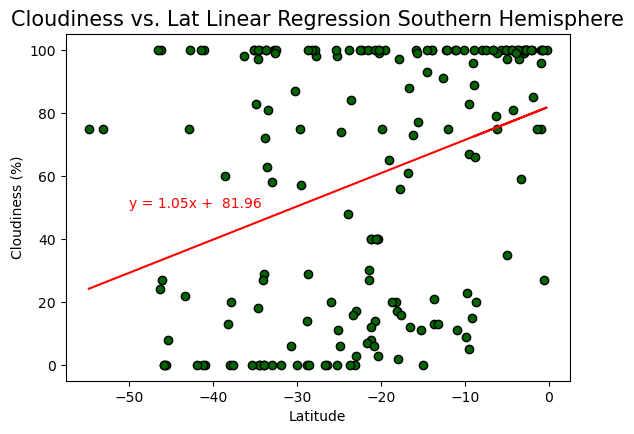

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x +  " + str(round(intercept,2))
plt.figure(figsize=[6.5,4.5])
plt.scatter(x_values, y_values,facecolor = "darkgreen", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-50,50),fontsize=10, color="red")
plt.title("Cloudiness vs. Lat Linear Regression Southern Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.savefig("../output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03.


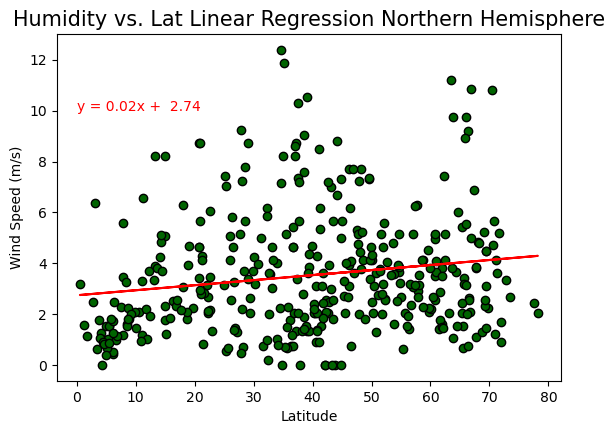

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x +  " + str(round(intercept,2))
plt.figure(figsize=[6.5,4.5])
plt.scatter(x_values, y_values,facecolor = "darkgreen", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (0,10),fontsize=10, color="red")
plt.title("Humidity vs. Lat Linear Regression Northern Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.savefig("../output_data/Fig11.png")
plt.show()

The r-value is: 0.03.


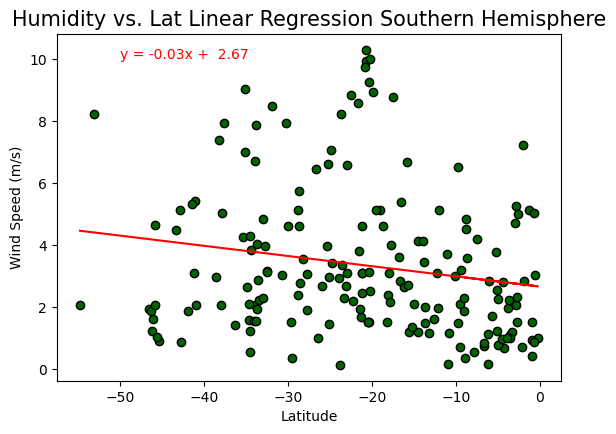

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x +  " + str(round(intercept,2))
plt.figure(figsize=[6.5,4.5])
plt.scatter(x_values, y_values,facecolor = "darkgreen", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-50,10),fontsize=10, color="red")
plt.title("Humidity vs. Lat Linear Regression Southern Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.savefig("../output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE